[Reference](https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e)

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-xv2dzbag
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-xv2dzbag
     |████████████████████████████████| 14.8MB 256kB/s 
     |████████████████████████████████| 10.9MB 62.9MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+55.g924cdf6-py2.py3-none-any.whl size=970002 sha256=c0b9b51dff93fabb162d8240feafb23540bced36d1eedc6ba1c1cd9d77b61cb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-pz72z4kv/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.


In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
import geoplot as gplt
from shapely.ops import cascaded_union
from shapely import wkt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Read geo data, might take a bit
raw = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Data-Visualization/master/Data/vn_geomap.csv')

In [45]:
raw.head()

,Name,Province,geometry,livestock,feed
0,Luc Ngan District,Bac Giang Province,MULTIPOLYGON (((106.6779403690001 21.602743149...,1,1
1,Son Dong District,Bac Giang Province,MULTIPOLYGON (((106.843231201 21.5023937230000...,2,2
2,Bach Long Vi District,Hai Phong City,MULTIPOLYGON (((107.7457122800001 20.170396805...,3,3
3,Con Co District,Quang Tri Province,MULTIPOLYGON (((107.3430862430001 17.149757385...,4,4
4,Ba Dinh District,Ha Noi City,MULTIPOLYGON (((105.8492431640001 21.054376602...,5,5


In [46]:
# Transfrom Pandas df to GeoPandas df
def transform_to_geopandas(row):
    try:
        return wkt.loads(row)[0]
    except:
        return 'Error'

In [47]:
# GEO_URL = URL_location
# geo = gpd.read_file(GEO_URL)

# # We only need to care about the Name, Province and geometry column
# geo = geo[['Name', 'Province', 'geometry']]
# geo.sample(10)

In [48]:
raw['geometry'] = raw['geometry'].apply(transform_to_geopandas)
raw = raw[raw['geometry'] != 'Error']

ParseException: Expected number but encountered end of stream
ParseException: Expected word but encountered end of stream
ParseException: Expected number but encountered end of stream


In [49]:
# Run this cell to restore to the original data
geo_data = gpd.GeoDataFrame(raw, geometry='geometry')

In [50]:
geo_data.head()

,Name,Province,geometry,livestock,feed
0,Luc Ngan District,Bac Giang Province,"POLYGON ((106.67794 21.60274, 106.68375 21.602...",1,1
1,Son Dong District,Bac Giang Province,"POLYGON ((106.84323 21.50239, 106.84381 21.498...",2,2
2,Bach Long Vi District,Hai Phong City,"POLYGON ((107.74571 20.17040, 107.74642 20.166...",3,3
3,Con Co District,Quang Tri Province,"POLYGON ((107.34309 17.14976, 107.34306 17.149...",4,4
4,Ba Dinh District,Ha Noi City,"POLYGON ((105.84924 21.05438, 105.85635 21.042...",5,5


In [51]:
# Generate some test data (Delete this cell if you have already run the above cell)
random_livestock = np.random.random(geo_data.shape[0])
geo_data['livestock'] = random_livestock

random_num = np.random.random(geo_data.shape[0])
geo_data['feed'] = random_num
# -------------------------

geo_data.head()

,Name,Province,geometry,livestock,feed
0,Luc Ngan District,Bac Giang Province,"POLYGON ((106.67794 21.60274, 106.68375 21.602...",0.079800,0.768445
1,Son Dong District,Bac Giang Province,"POLYGON ((106.84323 21.50239, 106.84381 21.498...",0.980176,0.989106
2,Bach Long Vi District,Hai Phong City,"POLYGON ((107.74571 20.17040, 107.74642 20.166...",0.068785,0.668701
3,Con Co District,Quang Tri Province,"POLYGON ((107.34309 17.14976, 107.34306 17.149...",0.912272,0.757988
4,Ba Dinh District,Ha Noi City,"POLYGON ((105.84924 21.05438, 105.85635 21.042...",0.446058,0.401419


In [52]:
DATA_URL = 'https://raw.githubusercontent.com/Branden-Kang/Data-Visualization/master/Data/vn_data.csv'
data = pd.read_csv(DATA_URL)
data.sample(10)

,Name,Province,Data
668,Duc Hoa District,Long An Province,697
633,Trang Bang District,Tay Ninh Province,107
659,Song Cau Town,Phu Yen Province,679
674,Kon Ray District,Kon Tum Province,280
131,Quang Tri Town,Quang Tri Province,940
323,Loc Binh District,Lang Son Province,942
581,Cam Le District,Da Nang City,555
626,Chau Thanh District,Tien Giang Province,828
167,Lien Chieu District,Da Nang City,553
216,Tan Lac District,Hoa Binh Province,553


In [54]:
geodata = geo_data.merge(data, how='inner', left_on=['Name','Province'], right_on=['Name','Province'])
geodata.sample(10)

,Name,Province,geometry,livestock,feed,Data
439,Tan Uyen District,Lai Chau Province,"POLYGON ((103.77923 22.30168, 103.78693 22.302...",0.391952,0.944991,690
293,Ba Che District,Quang Ninh Province,"POLYGON ((107.22752 21.37747, 107.23552 21.373...",0.632145,0.429948,218
494,Trang Bom District,Dong Nai Province,"POLYGON ((107.11936 11.07476, 107.11584 11.075...",0.009824,0.577983,868
181,Dien Bien Dong District,Dien Bien Province,"POLYGON ((103.20042 21.42891, 103.20311 21.428...",0.946866,0.589952,530
169,Que Son District,Quang Nam Province,"POLYGON ((108.28954 15.82447, 108.29141 15.828...",0.776218,0.145706,503
681,Gia Nghia Town,Dak Nong Province,"POLYGON ((107.74998 12.14100, 107.75687 12.131...",0.027295,0.076507,283
577,Hai Chau District,Da Nang City,"POLYGON ((108.21718 16.09409, 108.21974 16.095...",0.681538,0.887144,318
482,Vu Ban District,Nam Dinh Province,"POLYGON ((106.04724 20.46161, 106.04733 20.459...",0.108014,0.160039,846
42,Sam Son City,Thanh Hoa Province,"POLYGON ((105.91376 19.75506, 105.90765 19.746...",0.994798,0.201975,940
564,Cao Lanh District,Dong Thap Province,"POLYGON ((105.64511 10.66553, 105.66128 10.657...",0.172004,0.521473,607


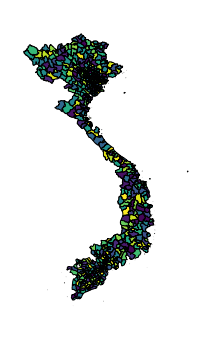

In [55]:
gplt.choropleth(geodata, hue = geodata['Data'])

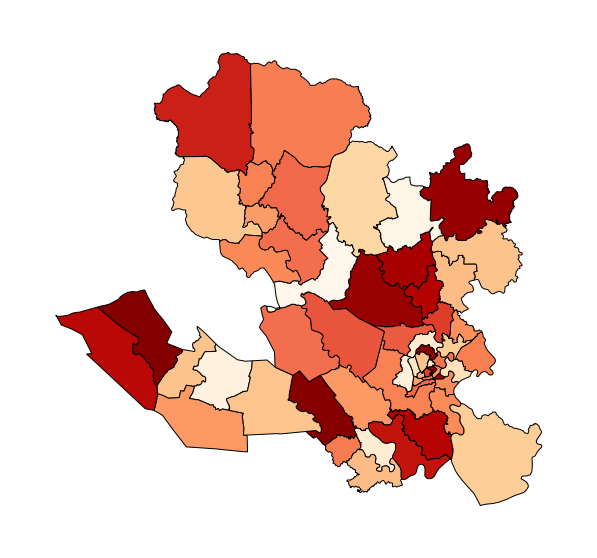

In [56]:
plotdata = geodata[geodata['Province'].isin(['Binh Duong Province','Tay Ninh Province','Long An Province','Ho Chi Minh City'])]
PALETTE = 'OrRd'

gplt.choropleth(plotdata, hue = plotdata['Data'], cmap = PALETTE, figsize = (15,10))

In [57]:
geodata['coords'] = geodata['geometry'].apply(lambda x: x.centroid.coords[:])
geodata['coords'] = [coords[0] for coords in geodata['coords']]

geodata.sample(10)

,Name,Province,geometry,livestock,feed,Data,coords
484,Huong Khe District,Ha Tinh Province,"POLYGON ((105.66737 18.36781, 105.67315 18.367...",0.088829,0.953234,586,"(105.679401445121, 18.177077641605663)"
599,Chu Puh District,Gia Lai Province,"POLYGON ((108.11021 13.63641, 108.12589 13.639...",0.737324,0.305587,268,"(108.07383869198065, 13.498211659495338)"
148,Yen Phong District,Bac Ninh Province,"POLYGON ((106.00027 21.25811, 106.00410 21.258...",0.121142,0.984976,366,"(105.97371086545486, 21.20810903835655)"
507,Dong Hung District,Thai Binh Province,"POLYGON ((106.32552 20.61399, 106.32804 20.613...",0.447537,0.061700,323,"(106.34886684417141, 20.543544849854815)"
496,Bau Bang District,Binh Duong Province,"POLYGON ((106.54039 11.38749, 106.54273 11.385...",0.315343,0.859728,124,"(106.60553893846364, 11.263862527407827)"
557,Chu Pah District,Gia Lai Province,"POLYGON ((108.23238 14.38933, 108.23111 14.385...",0.794827,0.206809,822,"(107.95465612204836, 14.192956586638527)"
625,Chau Thanh District,An Giang Province,"POLYGON ((105.29961 10.50035, 105.30670 10.503...",0.548895,0.111053,898,"(105.26599767047036, 10.421248236517473)"
657,Tra Vinh City,Tra Vinh Province,"POLYGON ((106.33268 10.00951, 106.34589 10.004...",0.910112,0.640667,850,"(106.3374719368132, 9.954363849387976)"
432,Cai Lay District,Tien Giang Province,"POLYGON ((106.09834 10.49905, 106.09631 10.499...",0.715060,0.028457,330,"(106.08434993378111, 10.390770489441165)"
532,Duyen Hai Town,Tra Vinh Province,"POLYGON ((106.57117 9.75177, 106.56394 9.74241...",0.351131,0.261142,342,"(106.51867496707334, 9.658554089685389)"


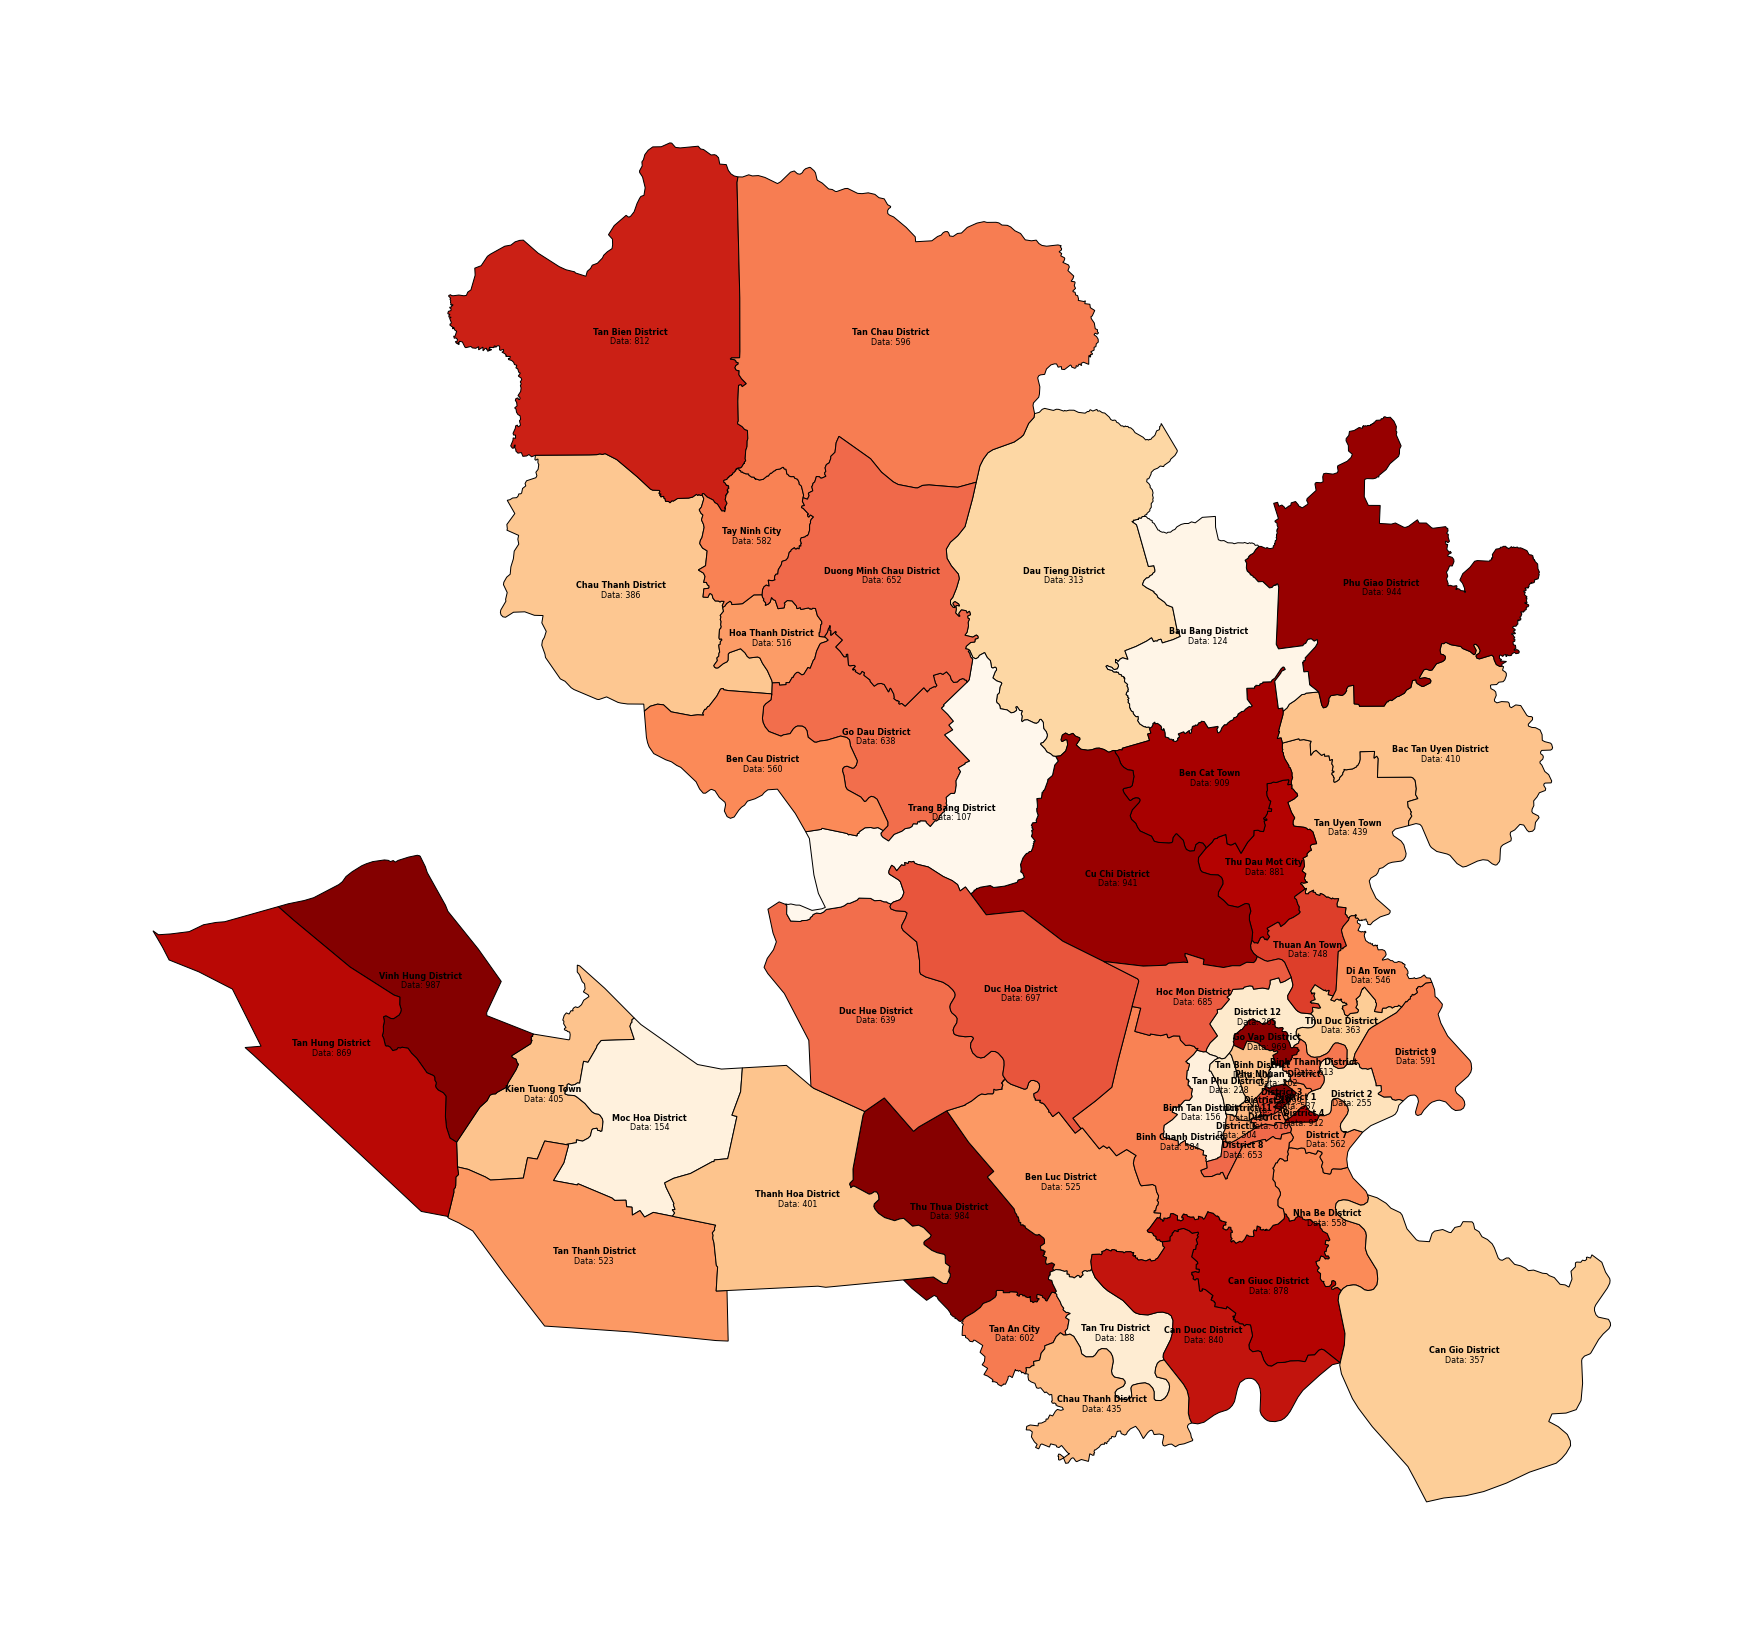

In [58]:
plotdata = geodata[geodata['Province'].isin(['Binh Duong Province','Tay Ninh Province','Long An Province','Ho Chi Minh City'])]
PALETTE = 'OrRd'

gplt.choropleth(plotdata, hue = plotdata['Data'], cmap = PALETTE, figsize = (60,30))

for _, row in plotdata.iterrows():

  hue = round(row['Data'],2)
  
  plt.text(s=row['Name'], x = row['coords'][0], y = row['coords'][1],
           horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8})

  plt.text(s='Data: ' + f'{hue:,}', x=row['coords'][0],y = row['coords'][1] - 0.01 ,
          horizontalalignment='center', fontdict = {'size': 8})

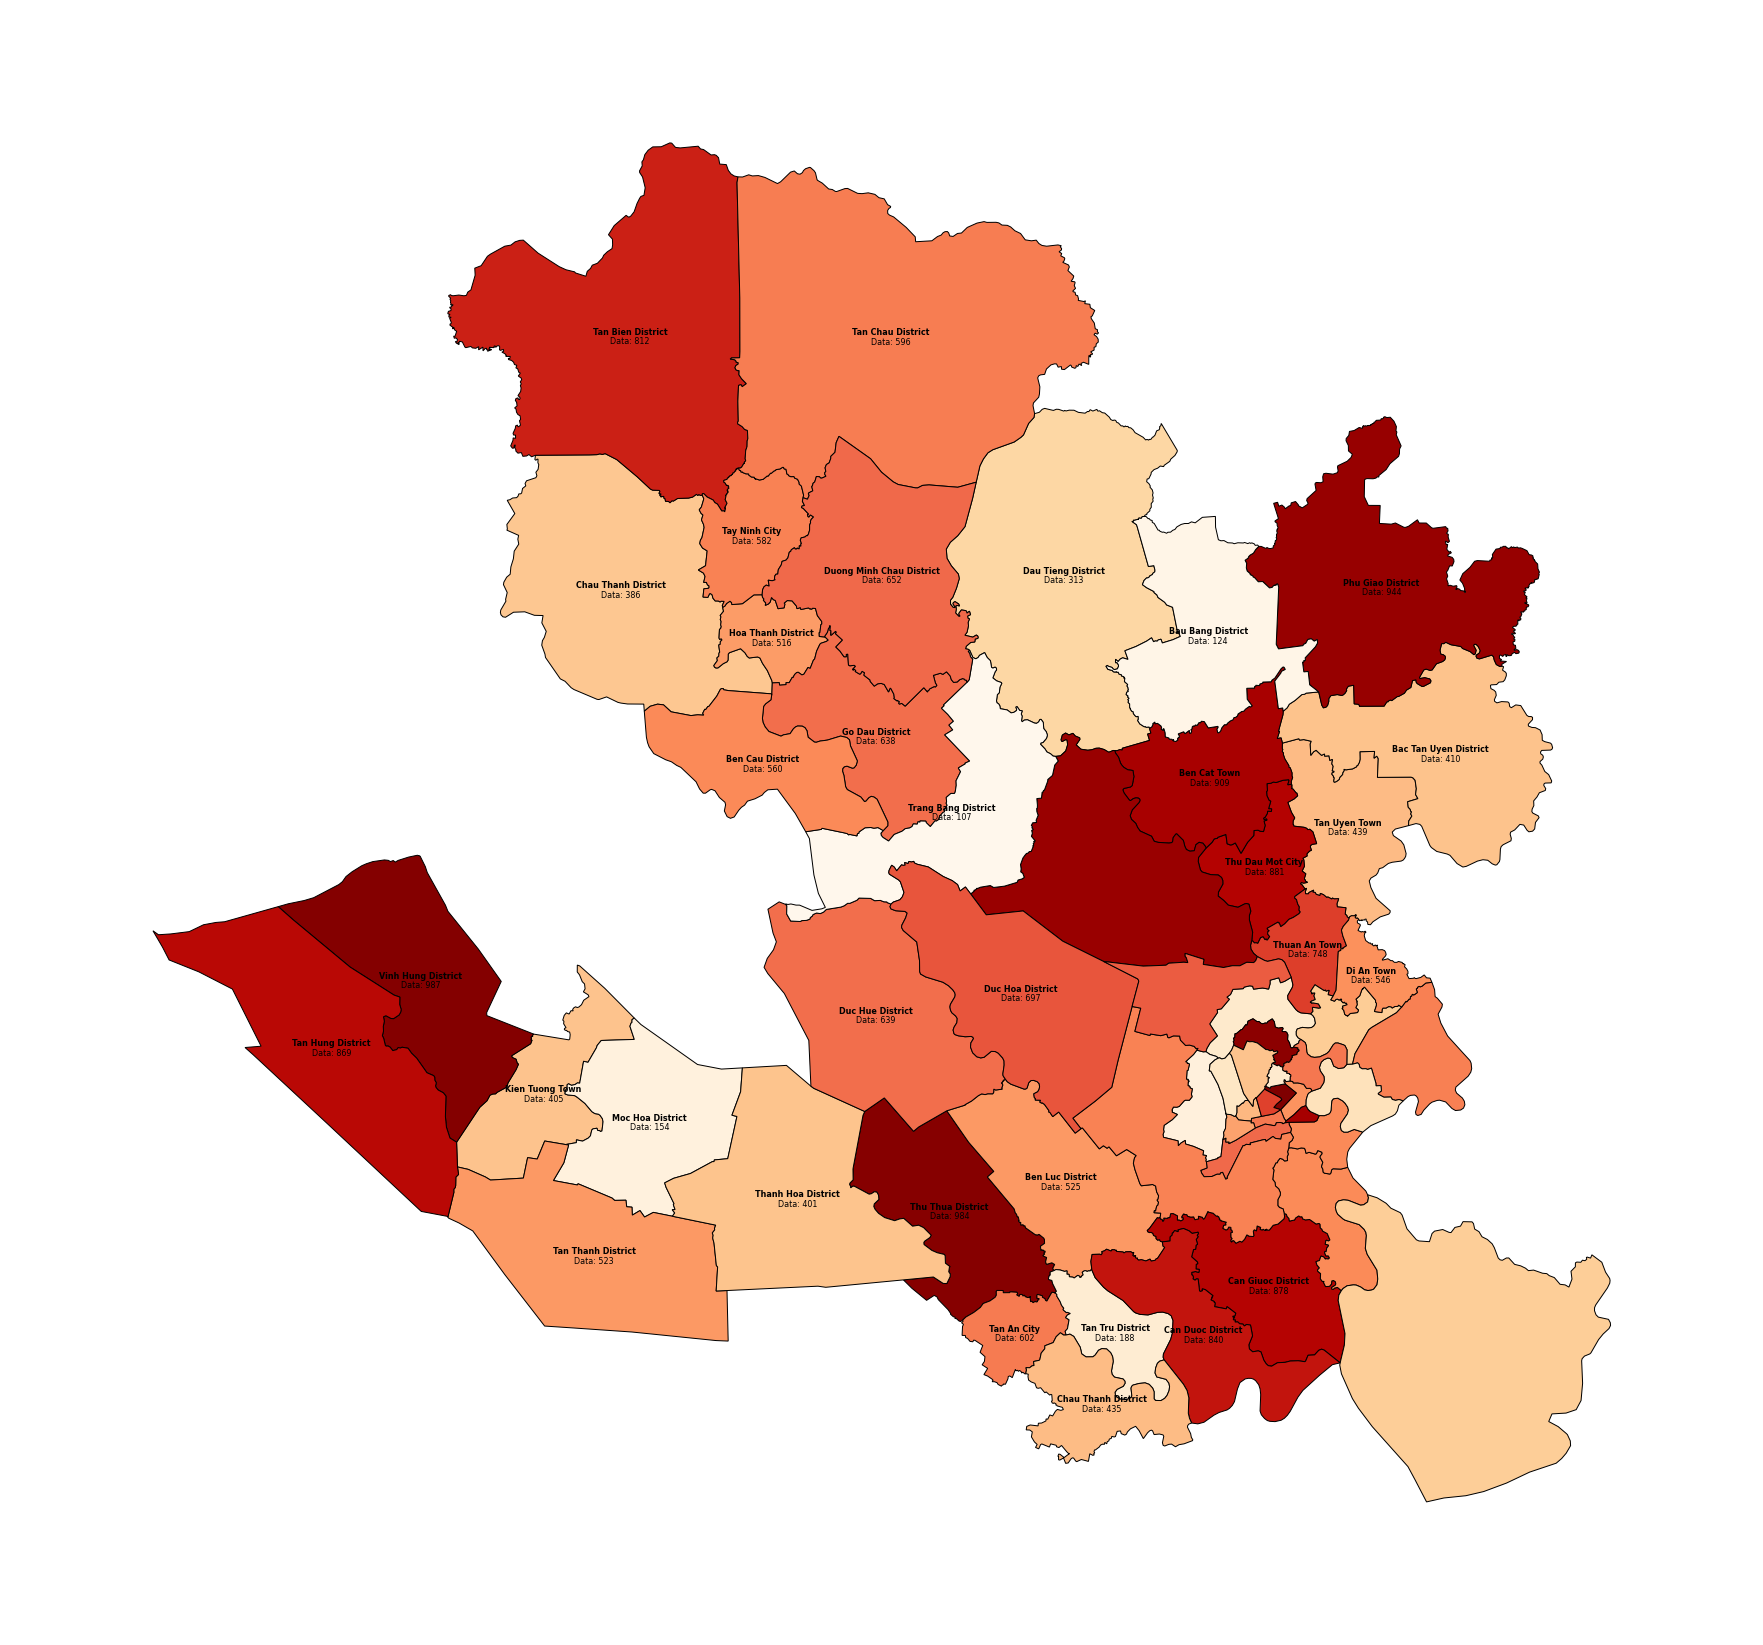

In [59]:
plotdata = geodata[geodata['Province'].isin(['Binh Duong Province','Tay Ninh Province','Long An Province','Ho Chi Minh City'])]
PALETTE = 'OrRd'
EXCLUDE_PROVINCE = ['Ho Chi Minh City']

gplt.choropleth(plotdata, hue = plotdata['Data'], cmap = PALETTE, figsize = (60,30))

for _, row in plotdata.iterrows():

  if row['Province'] not in EXCLUDE_PROVINCE:

    hue = round(row['Data'],2)
    plt.text(s=row['Name'], x = row['coords'][0], y = row['coords'][1],
            horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8})

    plt.text(s='Data: ' + f'{hue:,}', x=row['coords'][0],y = row['coords'][1] - 0.01 ,
            horizontalalignment='center', fontdict = {'size': 8})

In [60]:
plotdata_province = plotdata.dissolve(by='Province', aggfunc='sum')

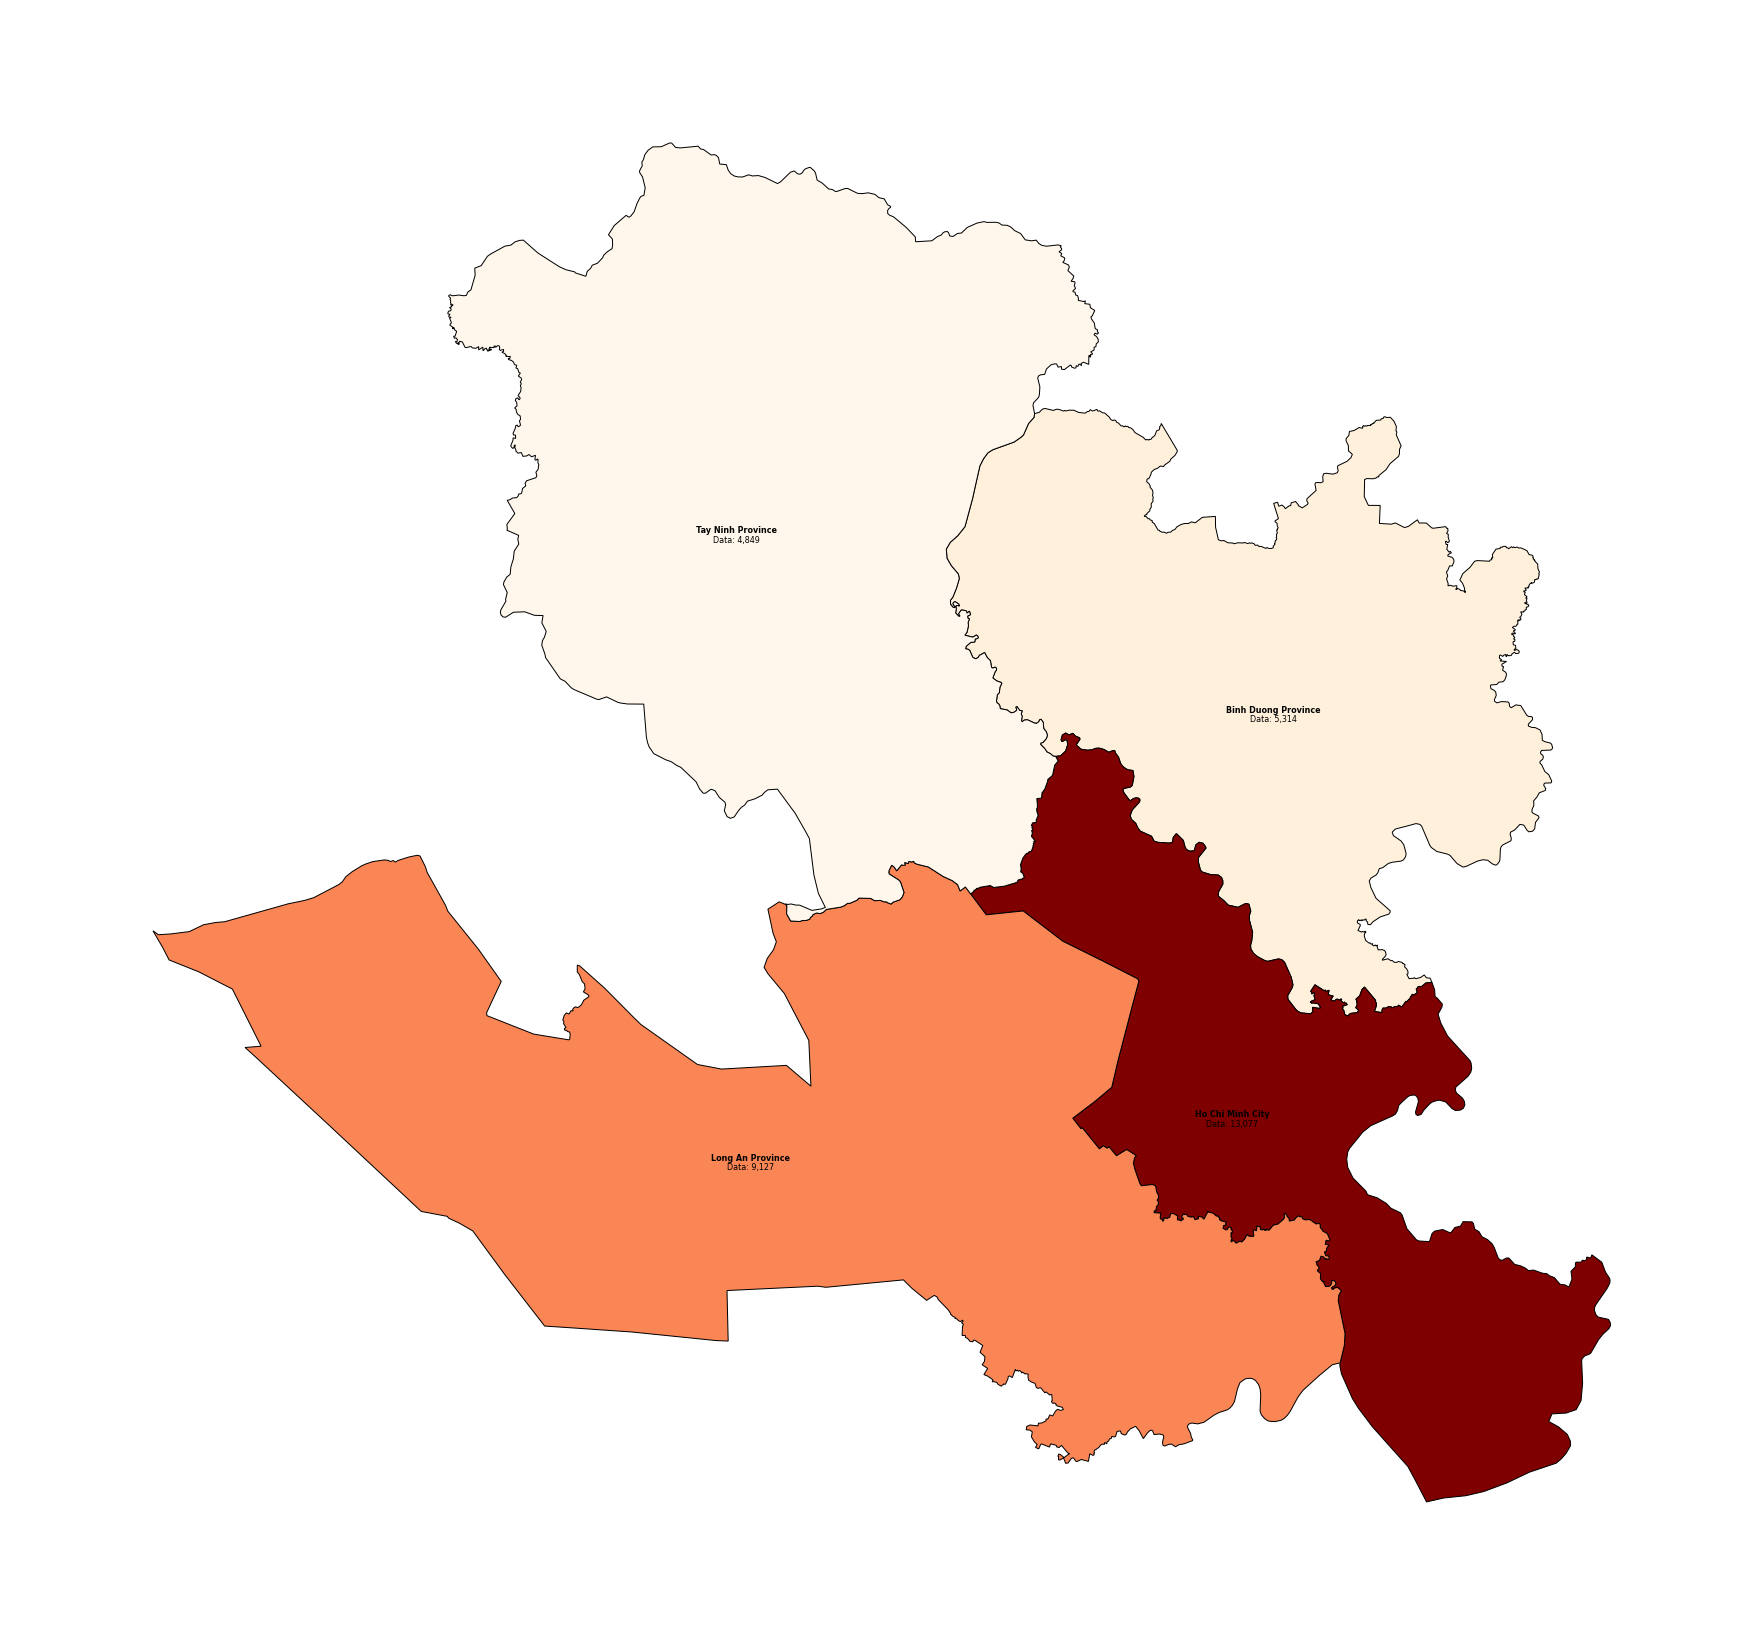

In [61]:
# We will need to generate the coordinates again
plotdata_province['coords'] = plotdata_province['geometry'].apply(lambda x: x.representative_point().coords[:])
plotdata_province['coords'] = [coords[0] for coords in plotdata_province['coords']]

PALETTE = 'OrRd'

gplt.choropleth(plotdata_province, hue = plotdata_province['Data'], cmap = PALETTE, figsize = (60,30))

for idx, row in plotdata_province.iterrows():

    hue = round(row['Data'],2)
    plt.text(s=idx, x = row['coords'][0], y = row['coords'][1], # The Province names are now in the index
            horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8})

    plt.text(s='Data: ' + f'{hue:,}', x=row['coords'][0],y = row['coords'][1] - 0.01 ,
            horizontalalignment='center', fontdict = {'size': 8})